In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Potencial Henón - Heiles 

$
V\left(x,y\right)=\frac{1}{2}\left (x^{2} + y^{2} \right) + \left (x^{2}y - \frac{1}{3}y^{3} \right)
$

In [2]:
#Función de potencial Henón - Heiles
def V(x,y):
    return 0.5*(x**2 + y**2 + 2*y*(x**2) - (2.0/3.0)*(y**3))

In [3]:
#Genera una supeficie del potencia
def supeficieV(xi,xf,yi,yf,numero):
    n = numero  #Numero de puntos generados en x
    x_min = xi #Minimo de x
    x_max = xf #Maximo de x
    y_min = yi #Minimo de y
    y_max = yf #Maximo de y
    x = linspace(x_min,x_max,n) #Genera el numero de puntos en el rango
    y = linspace(y_min,y_max,n)
    X, Y = meshgrid(x, y) #Genera la combinación de x,y
    Z = V(X, Y)  # Genera los valores de potencial para cada combinación
    return [X,Y,Z,x,y]

In [4]:
#Generamos un potencial en rango de -1 a 1 en x y y con 1000 puntos
potencial1 = supeficieV(-1,1,-1,1,10**3)

In [5]:
#Generamos un potencial en rango de -2 a 2 en x y y con 1000 puntos
potencial2 = supeficieV(-2,2,-2,2,10**3)

In [6]:
#Grafica el potencial en vista 3D
def graphPotencial3D(potencial):
    ax = plt.axes(projection='3d') 
    ax.plot_surface(potencial[0], potencial[1], potencial[2], rstride=1, cstride=1, cmap=cm.jet)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('V(x,y)')

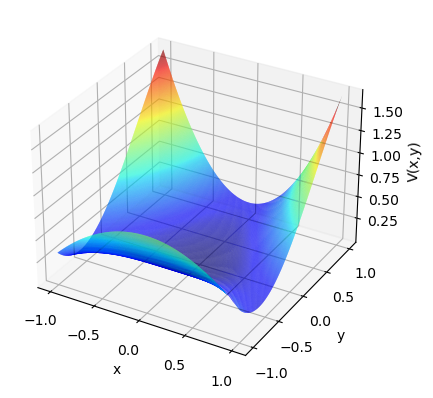

In [7]:
#Estas graficas pueden tardar algunos minutos debido que se utilizan matrices de 1000 x 1000 para generar una superficie suave
#Generalmente tardan menos de 3 minutos
graphPotencial3D(potencial1)

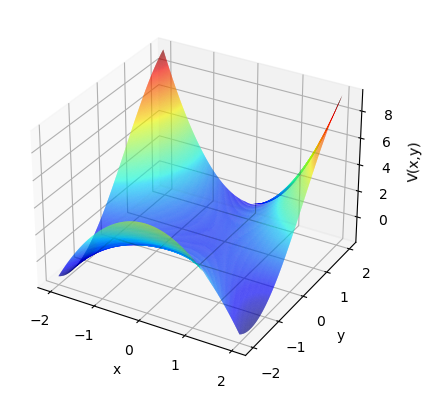

In [8]:
#Estas graficas pueden tardar algunos minutos debido que se utilizan matrices de 1000 x 1000 para generar una superficie suave
#Generalmente tardan menos de 3 minutos
graphPotencial3D(potencial2)

In [9]:
#Permite filtrar los x y y correspondiente a un valor de energia
def superficie(x,y,z,E,dE):
    NX = []
    NY = []
    for i in range(len(x)):
        for j in range(len(y)):
            if (abs(z[i][j] - E) <= dE):
                NX.append(x[j])
                NY.append(y[i])
    return [NX,NY]

In [10]:
def graphPotencial2D(potencial,E,dE,ds):
    #Genera una grafica 2d del potencial
    fig, ax = plt.subplots()
    p = ax.pcolor(potencial[0], potencial[1], potencial[2], cmap=cm.jet, shading='auto')

    #Filtra los datos para diferentes valores de energia para generar suspeficies equipotenciales

    for i in range(len(E)):
        e = superficie(potencial[3], potencial[4], potencial[2],E[i],dE[i])
        ax.scatter(e[0],e[1], color='white', s=ds)

    cb = fig.colorbar(p, ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

In [11]:
#Los valores E para las superfices
E1=[1,1/2,1/3,1/6,1/8,1/12,1/24,1/100]
E2=[8,15/2,7,13/2,6,11/2,5,9/2,4,7/2,3,5/2,2,3/2,
    1,1/2,1/3,1/6,1/8,1/12,1/24,-1/8,-1/3,-1/2,-1]

In [12]:
#La diferencia acepta del valor calculado con repecto al valor esperado
#Estos fueron elegidos para mejorar el aspeto visual, pueden ser modificado pero afectaran la apariencia de las graficas
dE1 = [0.005,0.005,0.005,0.0005,0.0005,0.0005,0.0005,0.0001]
dE2 = [0.03,0.03,0.03,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,
       0.005,0.005,0.005,0.003,0.00095,0.00095,0.0009,0.005,0.008,0.008,0.008]

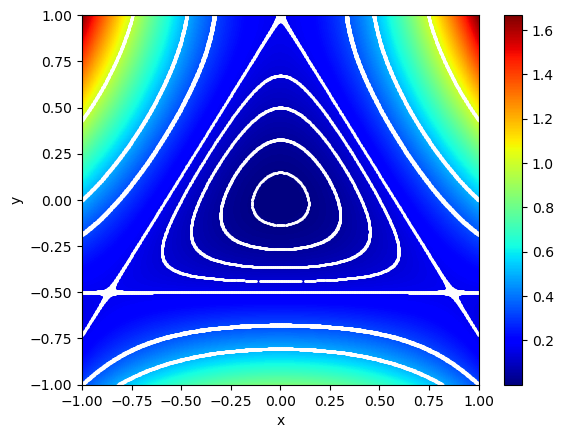

In [13]:
graphPotencial2D(potencial1,E1,dE1,0.5)

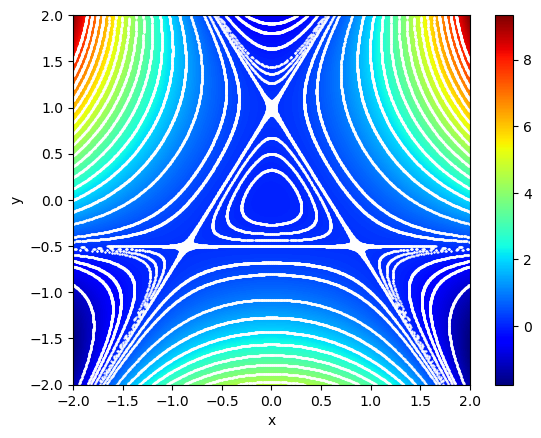

In [14]:
graphPotencial2D(potencial2,E2,dE2,0.3)